# Tatoeba translation scores

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_palette("deep")

In [4]:
PLOTS_PATH = "../plots"

In [5]:
df = pd.read_csv("../data/tatoeba_train_opus_scores.tsv", sep="\t", index_col=0)

df.sample(10)

,translation,bleu,cosine_src_gold,cosine_src_tr,cosine_gold_tr
line_idx,,,,,
82353,Я хочу поговорить с тобой наедине.,1.000000,0.091308,0.091308,0.000000
301283,Это яблоко большое.,0.275348,0.099125,0.137122,0.076761
127852,Я ничего не понял.,1.000000,0.063073,0.063073,0.000000
486485,Не зли меня.,0.353553,0.094773,0.122098,0.018450
320398,"Ты был моряком, не так ли?",0.131345,0.143900,0.071510,0.083340
206116,Он был погружен в свою кровать с болезнью.,0.134851,0.180797,0.166105,0.119118
163348,Ребенок вбежал в дом.,0.668740,0.059838,0.066107,0.011583
189599,"Том попросил нас подождать, пока он не приедет.",0.277762,0.161519,0.116409,0.032651
87597,"Сколько профессиональных музыкантов, по-твоему...",0.133543,0.087382,0.092139,0.026281


In [6]:
df.describe()

,bleu,cosine_src_gold,cosine_src_tr,cosine_gold_tr
count,491480.000000,491480.000000,491480.000000,491480.000000
mean,0.492341,0.107655,0.098586,0.043265
std,0.331849,0.066054,0.051993,0.072209
min,0.004618,0.009430,0.009430,0.000000
25%,0.206124,0.066279,0.064505,0.000287
50%,0.379918,0.090802,0.086903,0.012435
75%,0.809107,0.128294,0.118271,0.056258
max,1.000000,1.053983,1.347007,1.332027


In [100]:
print("Correlation between evaluation scores")

df.corr()

Correlation between evaluation scores


,bleu,cosine_src_gold,cosine_src_tr,cosine_gold_tr,lengths,reference_length,len_ratio
bleu,1.000000,-0.266711,-0.180620,-0.475759,-0.102372,-0.128083,0.022457
cosine_src_gold,-0.266711,1.000000,0.643236,0.705231,0.103785,0.093046,0.102397
cosine_src_tr,-0.180620,0.643236,1.000000,0.469238,0.077062,0.111499,-0.078367
cosine_gold_tr,-0.475759,0.705231,0.469238,1.000000,0.001729,0.023438,0.020299
lengths,-0.102372,0.103785,0.077062,0.001729,1.000000,0.946593,0.142267
reference_length,-0.128083,0.093046,0.111499,0.023438,0.946593,1.000000,-0.138180
len_ratio,0.022457,0.102397,-0.078367,0.020299,0.142267,-0.138180,1.000000


In [7]:
from datetime import date
import os

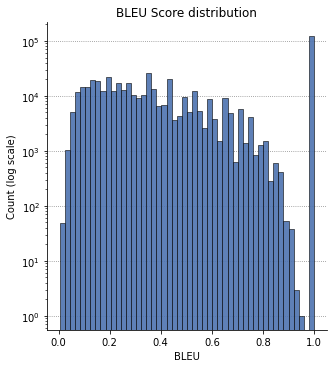

In [140]:
sns.displot(data=df, x="bleu", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="BLEU Score distribution",
    xlabel="BLEU",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"bleu_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

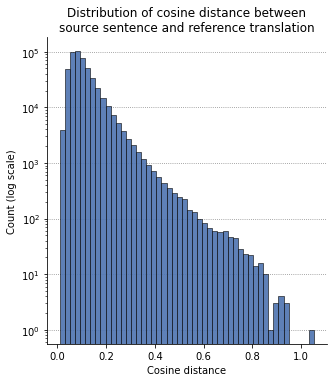

In [141]:
sns.displot(data=df, x="cosine_src_gold", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Distribution of cosine distance between\nsource sentence and reference translation",
    xlabel="Cosine distance",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_src_gold_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

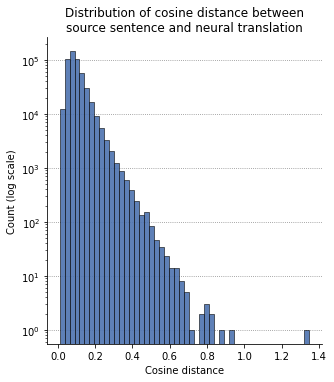

In [142]:
sns.displot(data=df, x="cosine_src_tr", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Distribution of cosine distance between\nsource sentence and neural translation",
    xlabel="Cosine distance",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_src_tr_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

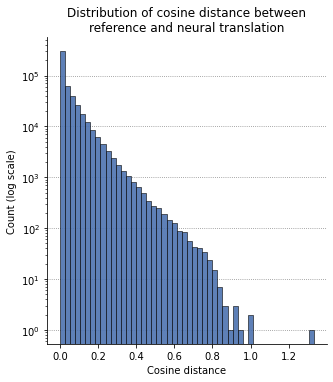

In [143]:
sns.displot(data=df, x="cosine_gold_tr", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Distribution of cosine distance between\nreference and neural translation",
    xlabel="Cosine distance",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_gold_tr_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

## Joint distributions for cosine distances

In [144]:
from matplotlib.colors import LogNorm

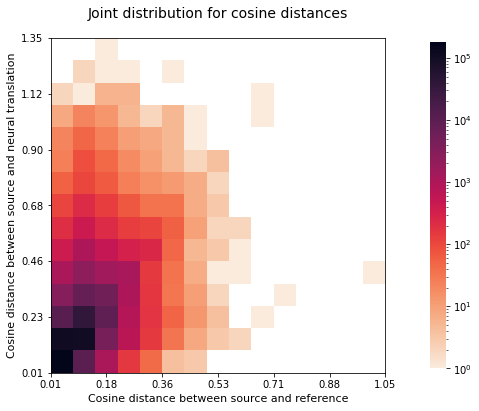

In [155]:
plt.figure(figsize=(8, 8))

map_data, xedges, yedges = np.histogram2d(df.cosine_src_gold, df.cosine_src_tr, bins=15)

res = sns.heatmap(map_data, cmap="rocket_r", norm=LogNorm(), square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Joint distribution for cosine distances",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between source and reference", fontsize=11)
ax.set_ylabel("Cosine distance between source and neural translation", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(lambda x: f"{x:.2f}", np.linspace(xedges[0], xedges[-1], 7)))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(lambda x: f"{x:.2f}", np.linspace(yedges[0], yedges[-1], 7)))

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr-src_gold-src_tr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

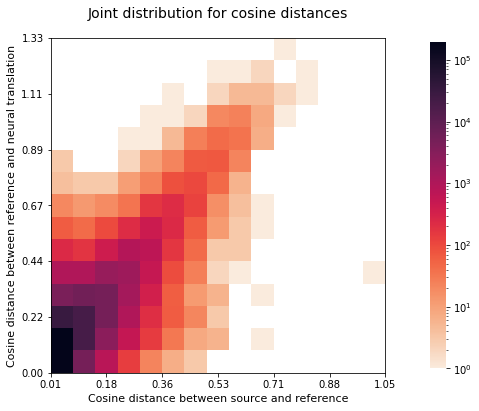

In [159]:
plt.figure(figsize=(8, 8))

map_data, xedges, yedges = np.histogram2d(df.cosine_src_gold, df.cosine_gold_tr, bins=15)

res = sns.heatmap(map_data, cmap="rocket_r", norm=LogNorm(), square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Joint distribution for cosine distances",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between source and reference", fontsize=11)
ax.set_ylabel("Cosine distance between reference and neural translation", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(lambda x: f"{x:.2f}", np.linspace(xedges[0], xedges[-1], 7)))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(lambda x: f"{x:.2f}", np.linspace(yedges[0], yedges[-1], 7)))

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr-src_gold-gold_tr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

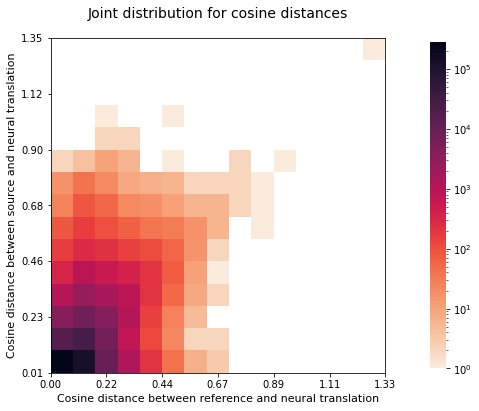

In [160]:
plt.figure(figsize=(8, 8))

map_data, xedges, yedges = np.histogram2d(df.cosine_gold_tr, df.cosine_src_tr, bins=15)

res = sns.heatmap(map_data, cmap="rocket_r", norm=LogNorm(), square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Joint distribution for cosine distances",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between reference and neural translation", fontsize=11)
ax.set_ylabel("Cosine distance between source and neural translation", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(lambda x: f"{x:.2f}", np.linspace(xedges[0], xedges[-1], 7)))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(lambda x: f"{x:.2f}", np.linspace(yedges[0], yedges[-1], 7)))

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr-gold_tr-src_tr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

## Relationship between all cosine distances

In [121]:
import warnings

warnings.simplefilter("once")

/var/folders/18/0v6pzkhx2_v0c28pjmnp4ynh0000gn/T/ipykernel_2471/3012236981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data["src_gold_bin"] = pd.cut(df.cosine_src_gold, bins=15)


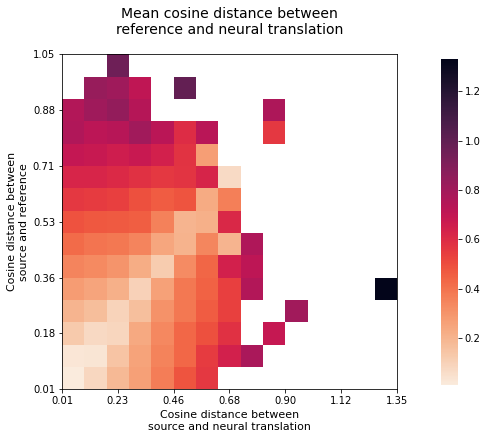

In [128]:
tmp_data = df[["cosine_gold_tr"]]

tmp_data["src_gold_bin"] = pd.cut(df.cosine_src_gold, bins=15)
tmp_data["src_tr_bin"] = pd.cut(df.cosine_src_tr, bins=15)

tmp_data = tmp_data.groupby(by=["src_gold_bin", "src_tr_bin"]).mean().reset_index()
tmp_data = tmp_data.pivot(index="src_gold_bin", columns="src_tr_bin")

plt.figure(figsize=(8, 8))

res = sns.heatmap(tmp_data, cmap="rocket_r", square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Mean cosine distance between\nreference and neural translation",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between\nsource and neural translation", fontsize=11)
ax.set_ylabel("Cosine distance between\nsource and reference", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(
    lambda x: f"{x:.2f}", 
    np.linspace(df.cosine_src_tr.min(), df.cosine_src_tr.max(), 7)
))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(
    lambda x: f"{x:.2f}", 
    np.linspace(df.cosine_src_gold.min(), df.cosine_src_gold.max(), 7)
))

plt.show()

/var/folders/18/0v6pzkhx2_v0c28pjmnp4ynh0000gn/T/ipykernel_2471/4101852113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data["gold_tr_bin"] = pd.cut(df.cosine_gold_tr, bins=15)


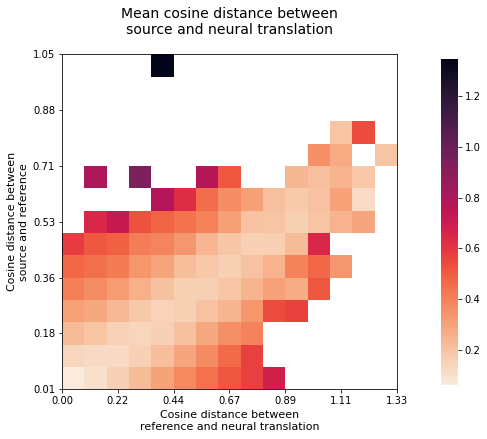

In [131]:
tmp_data = df[["cosine_src_tr"]]

tmp_data["gold_tr_bin"] = pd.cut(df.cosine_gold_tr, bins=15)
tmp_data["src_gold_bin"] = pd.cut(df.cosine_src_gold, bins=15)

tmp_data = tmp_data.groupby(by=["gold_tr_bin", "src_gold_bin"]).mean().reset_index()
tmp_data = tmp_data.pivot(index="gold_tr_bin", columns="src_gold_bin")

plt.figure(figsize=(8, 8))

res = sns.heatmap(tmp_data, cmap="rocket_r", square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Mean cosine distance between\nsource and neural translation",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between\nreference and neural translation", fontsize=11)
ax.set_ylabel("Cosine distance between\nsource and reference", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(
    lambda x: f"{x:.2f}", 
    np.linspace(df.cosine_gold_tr.min(), df.cosine_gold_tr.max(), 7)
))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(
    lambda x: f"{x:.2f}", 
    np.linspace(df.cosine_src_gold.min(), df.cosine_src_gold.max(), 7)
))

plt.show()

## Translation lengths

Hallucinations seem to make sentences much longer. Let's check out translation lengths.

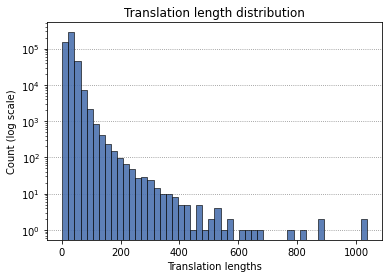

In [22]:
df["lengths"] = df.translation.str.len()

sns.histplot(df.lengths, bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Translation length distribution",
    xlabel="Translation lengths",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"translation_length_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

In [81]:
corpus_df = pd.read_csv("../data/tatoeba_train.tsv", sep="\t", names=["lang1", "lang2", "sent1", "sent2"])
corpus_df = corpus_df.loc[df.index]

df["reference_length"] = corpus_df.sent2.str.len()
df["src"] = corpus_df.sent1

del corpus_df

In [83]:
df["len_ratio"] = df.lengths / df.reference_length

In [92]:
with open("data.log", "w") as f:
    for row in df[df.len_ratio > 2.5].itertuples():
        print(row.src, file=f)
        print(row.translation, file=f)
        print(row.Index, file=f)
        print("", file=f)

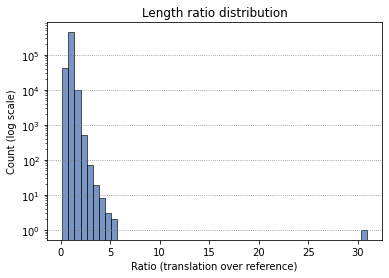

In [99]:
sns.histplot(df.len_ratio, bins=50)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Length ratio distribution",
    xlabel="Ratio (translation over reference)",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.show()

## Separating data into bad translations and good translations

In [57]:
cut_df = df[((df.bleu - 20 / 7 * df.cosine) < 0) & (df.bleu > 0.4)]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 1293


,translation,cosine,bleu
line_idx,,,
56008,Тома трижды выстрелили в спину.,0.171484,0.430125
463826,Я ценю вашу позицию.,0.157124,0.427287
127272,Том промок.,0.168484,0.451386
337445,Правильные ошибки.,0.204098,0.550321
384134,"Счет, пожалуйста.",0.308525,0.594604
261315,Терпение.,0.470843,0.500000
321257,"Кто-то, должно быть, оставил воду в течении.",0.197078,0.537285
265819,Ясно.,0.260434,0.500000
342076,"Я чувствую, что перевод стал очень неприятным.",0.185114,0.467138


In [96]:
# Zone of idiomes
cut_df = df[df.cosine > 0.8]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 33


,translation,cosine,bleu
68962,"Предвидимая опасность — это опасность, которой...",0.807362,0.049900
426306,Многие хрени делают из хлама.,0.832403,0.081167
98951,У маленьких горшков длинные ручки.,0.806493,0.081167
133332,Многие делают щекотку.,0.926431,0.058764
47231,Дождь идет кошкам и собакам.,0.821410,0.081167
300389,Естественно.,0.823215,0.151633
262133,Это кусок торта.,0.832333,0.159736
423224,Поговорите о дьяволе и он обязательно появится.,0.956265,0.055224
328865,Цепочка не срабатывает на самом слабом звене.,0.806969,0.055224
241218,Вааааааааааааааааааааааааааааааааааааааааааааа...,1.332027,0.067668


In [97]:
# Great translations by both metrics
cut_df = df[(df.cosine < 0.1) & (df.bleu > 0.9)]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 121244


,translation,cosine,bleu
58741,Это все?,0.0,1.0
199553,Я оставил им пару сообщений.,0.0,1.0
41384,Чем я могу ему помочь?,0.0,1.0
325601,Ты любишь слонов.,0.0,1.0
96935,"Мэри сказала мне, что хочет поговорить.",0.0,1.0
454040,Я тоже жил в Гамбурге.,0.0,1.0
122033,Я из Дании.,0.0,1.0
486247,Пора вернуться к реальности.,0.0,1.0
118413,Мы с Томом давно женаты.,0.0,1.0
100606,У него новая девушка.,0.0,1.0
